In [1]:
import json
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [2]:
hc3human = []
hc3machine = []
gpt35human = []
gpt35machine = []
file1 = "hc3_test_adj_30_synonym_replace"
with open(f"perturbed_text/{file1}.json", 'r', encoding='utf-8') as f:
    for line in f.readlines():
        line = json.loads(line)
        if line['label'] == "hc3human":
            hc3human.append(line['text'])
        else:
            hc3machine.append(line['text'])

file2 = "gpt3.5_mixed_test_adj_30_synonym_replace"
with open(f"perturbed_text/{file2}.json", 'r', encoding='utf-8') as f:
    for line in f.readlines():
        line = json.loads(line)
        if line['label'] == "human":
            gpt35human.append(line['text'])
        else:
            gpt35machine.append(line['text'])

In [4]:
lengths_hc3human = np.array([len(text.strip().split()) for text in hc3human])
lengths_hc3machine = np.array([len(text.strip().split()) for text in hc3machine])
lengths_gpt35human = np.array([len(text.strip().split()) for text in gpt35human])
lengths_gpt35machine = np.array([len(text.strip().split()) for text in gpt35machine])

In [5]:
kde1 = gaussian_kde(lengths_hc3human)
kde2 = gaussian_kde(lengths_hc3machine)
kde3 = gaussian_kde(lengths_gpt35human)
kde4 = gaussian_kde(lengths_gpt35machine)

In [6]:
x = np.linspace(min(lengths_gpt35human.min(), lengths_gpt35machine.min()), max(lengths_gpt35human.max(), lengths_gpt35machine.max()), 1000)

# 计算核密度
density1 = kde3(x)
density2 = kde4(x)

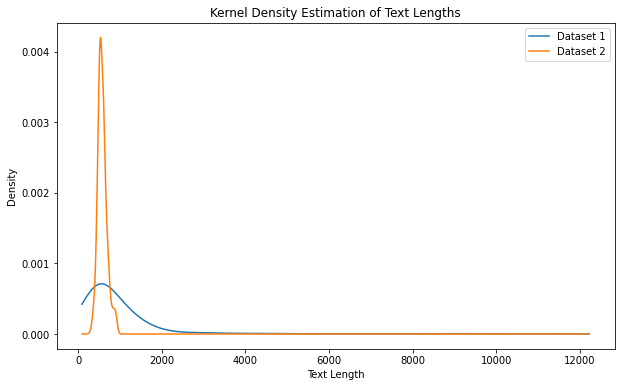

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(x, density1, label='Dataset 1')
plt.plot(x, density2, label='Dataset 2')
plt.title('Kernel Density Estimation of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.legend()
plt.show()

In [8]:
matched_texts = []
for length in lengths_gpt35human:
    closest_match_index = np.argmin(np.abs(lengths_gpt35machine - length))
    matched_texts.append((gpt35human[np.argmin(np.abs(lengths_gpt35human - length))], gpt35machine[closest_match_index]))

In [9]:
len(matched_texts)

500

In [10]:
matched_lengths_human = np.array([len(text[0].strip().split()) for text in matched_texts])
matched_lengths_machine = np.array([len(text[1].strip().split()) for text in matched_texts])
matched_kde1 = gaussian_kde(matched_lengths_human)
matched_kde2 = gaussian_kde(matched_lengths_machine)
density1 = matched_kde1(x)
density2 = matched_kde2(x)

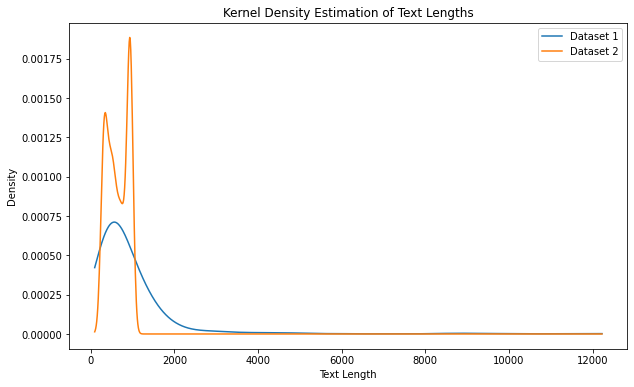

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(x, density1, label='Dataset 1')
plt.plot(x, density2, label='Dataset 2')
plt.title('Kernel Density Estimation of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.legend()
plt.show()

In [12]:
with open(f"perturbed_text/matched_{file2}.json", "w", encoding="utf-8") as w:
    for text in matched_texts:
        w.write(json.dumps({"text": text[0], "label": "human"}))
        w.write("\n")
        w.write(json.dumps({"text": text[1], "label": "machine"}))
        w.write("\n")